## Capstone 2 for Thinkful:

**First:** Go out and find a dataset of interest. It could be from one of our recommended resources, some other aggregation, or scraped yourself. Just make sure it has lots of variables in it, including an outcome of interest to you.

**Second:** Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

**Third:** Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power and experiment with both.

**Deliverable:** Prepare a slide deck and 15 minute presentation that guides viewers through your model. Be sure to cover a few specific things:

 -- A specified research question your model addresses
 
 -- How you chose your model specification and what alternatives you compared it to
 
 --The practical uses of your model for an audience of interest
 
 --Any weak points or shortcomings of your model

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats.mstats import winsorize
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
import warnings
import datetime 
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from pandas.plotting import table 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

#Get dataset

kiva_df=pd.read_csv('/Users/sjadallah/Dropbox/Thinkful_data/Capstone 2 Supervised Learning/Kiva Dataset/kiva_loans.csv')

In [2]:
kiva_df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


### 1) Explore Data set; clean as needed

In [3]:
#Let's see what the Kiva dataset is comprised of...
kiva_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666973 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null object
disbursed_time        668809 non-null object
funded_time           622874 non-null object
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  499789 non-null object
borrower_genders      666984 non-null object
repayment_interval    671205 non-null object
date                  671205 non

In [4]:
#Check unique values for each feature
kiva_df.nunique()

id                    671205
funded_amount            610
loan_amount              479
activity                 163
sector                    15
use                   424912
country_code              86
country                   87
region                 12695
currency                  67
partner_id               366
posted_time           667399
disbursed_time          5719
funded_time           498007
term_in_months           148
lender_count             503
tags                   86719
borrower_genders       11298
repayment_interval         4
date                    1298
dtype: int64

In [5]:
#Check for NaN or missing values
kiva_df.isnull().sum()/kiva_df.isnull().count()

id                    0.000000
funded_amount         0.000000
loan_amount           0.000000
activity              0.000000
sector                0.000000
use                   0.006305
country_code          0.000012
country               0.000000
region                0.084624
currency              0.000000
partner_id            0.020124
posted_time           0.000000
disbursed_time        0.003570
funded_time           0.072006
term_in_months        0.000000
lender_count          0.000000
tags                  0.255385
borrower_genders      0.006289
repayment_interval    0.000000
date                  0.000000
dtype: float64

In [6]:
#Drop the NaN values.  There are not a lot as a % and the 'tags' column is not a key feature,

#will drop all rows with missing values as impact will be immaterial to overall dataset
kiva_df = kiva_df.dropna()

#Drop fields that will not be needed: id, tags, partner_id
kiva_df = kiva_df.drop(['tags', 'partner_id'], axis=1)

#Rename country column to 'kiva country name' for future merge
kiva_df.rename(columns = {'country' : 'kiva_country_name'}, inplace=True)

#Convert the 'id' field into a string so it doesn't interfere with any statistical analysis or clean up
kiva_df['id'] = kiva_df['id'].apply(str)

In [7]:
#Pull descriptive statistics on dataset; check for potential outliers 
round(kiva_df.describe(),2)

,funded_amount,loan_amount,term_in_months,lender_count
count,423081.00,423081.00,423081.00,423081.00
mean,849.45,849.45,14.18,23.47
std,1134.65,1134.65,8.63,30.70
min,25.00,25.00,2.00,1.00
25%,300.00,300.00,8.00,9.00
50%,500.00,500.00,14.00,15.00
75%,1000.00,1000.00,14.00,29.00
max,100000.00,100000.00,158.00,2986.00


In [8]:
#There is quite a large disparity in the dataset after the 75% quartile; the data jumps from $1000 lent to a 
#max of $100,000.  Need to remove the outliers and will use winsorize function.
#only doing a one-tail limit as I want to keep the lowest values.  

def using_mstats(s):
    return winsorize(s, limits=[0 ,0.05])

kiva_df = kiva_df.apply(using_mstats, axis=0)
kiva_df.quantile([0, 0.05, 0.25, 0.5, 0.75, 0.95, 1])

,funded_amount,loan_amount,term_in_months,lender_count
0.00,25.0,25.0,2.0,1.0
0.05,150.0,150.0,7.0,3.0
0.25,300.0,300.0,8.0,9.0
0.50,500.0,500.0,14.0,15.0
0.75,1000.0,1000.0,14.0,29.0
0.95,2750.0,2750.0,27.0,70.0
1.00,2750.0,2750.0,27.0,70.0


In [9]:
#Check updated statistics on dataset
round(kiva_df.describe(), 2)

,funded_amount,loan_amount,term_in_months,lender_count
count,423081.00,423081.00,423081.00,423081.00
mean,766.86,766.86,13.46,21.31
std,678.04,678.04,5.58,17.87
min,25.00,25.00,2.00,1.00
25%,300.00,300.00,8.00,9.00
50%,500.00,500.00,14.00,15.00
75%,1000.00,1000.00,14.00,29.00
max,2750.00,2750.00,27.00,70.00


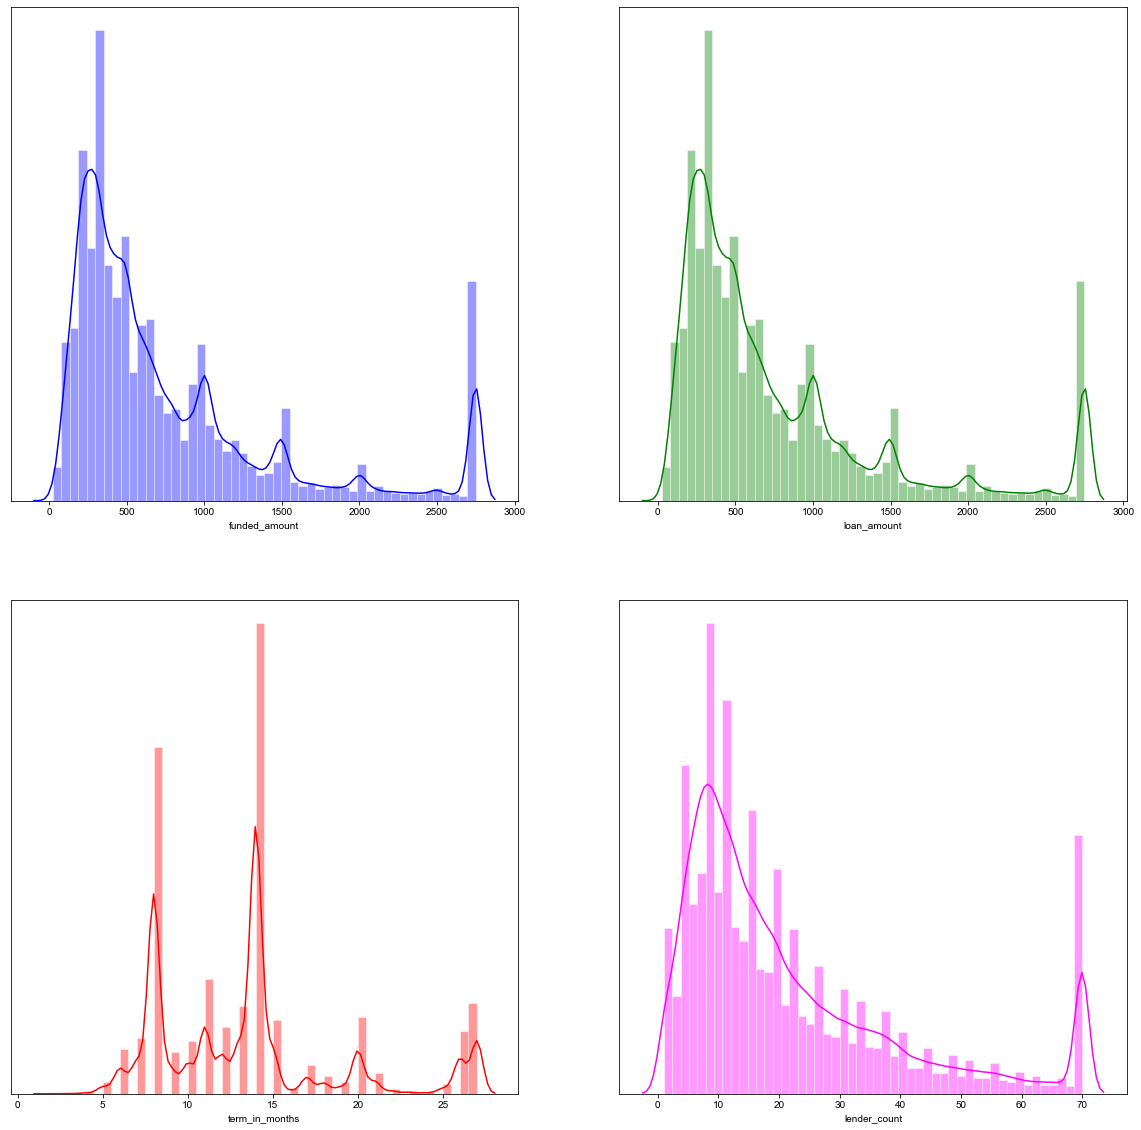

In [10]:
#Visually check the outliers using histograms
#Using seaborn distribution plots with density function

f, axes = plt.subplots(2, 2, figsize=(20, 20))
sns.set_context(font_scale=20)
sns.set(style="white", palette="bright", color_codes=True)


sns.distplot(kiva_df['funded_amount'], color="blue", ax=axes[0,0])
sns.distplot(kiva_df['loan_amount'], color="green",ax=axes[0,1])
sns.distplot(kiva_df['term_in_months'], color="red", ax=axes[1,0])
sns.distplot(kiva_df['lender_count'], color="magenta", ax=axes[1,1])

plt.setp(axes, yticks=[])
plt.savefig('data_distribution&density_graphs.png')
plt.show()

In [11]:
#import another dataframe to merge the two using inner join
#The other dataframe pulls in country related data such as poverty rates, 
#gross national income and education levels.  These will be used to enhance
#the feature set for building a model.  

#Get data
country=pd.read_csv('/Users/sjadallah/Dropbox/Thinkful_data/Capstone 2 Supervised Learning/Kiva Dataset/kiva_clean.ds/country_stats.csv')

country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 14 columns):
Unnamed: 0                       172 non-null int64
country_name                     172 non-null object
country_code                     172 non-null object
country_code3                    172 non-null object
continent                        172 non-null object
region                           172 non-null object
population                       172 non-null int64
population_below_poverty_line    172 non-null float64
hdi                              172 non-null float64
life_expectancy                  172 non-null float64
expected_years_of_schooling      172 non-null float64
mean_years_of_schooling          172 non-null float64
gni                              172 non-null float64
kiva_country_name                172 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 18.9+ KB


In [12]:
#Drop the additional column that is not needed
country.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
#Check statistics of this dataset
round(country.describe(),2)

,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
count,1.720000e+02,172.00,172.00,172.00,172.00,172.00,172.00
mean,2.656179e+07,28.10,0.70,71.06,12.88,8.27,16518.92
std,3.741101e+07,15.56,0.16,8.48,2.88,3.13,15556.16
min,1.964400e+05,0.20,0.35,48.94,4.87,1.44,587.47
25%,4.127043e+06,16.45,0.56,64.89,10.76,5.75,3511.38
50%,1.047390e+07,28.14,0.72,72.53,13.02,8.36,11451.28
75%,3.192725e+07,35.85,0.83,77.04,15.14,11.20,24242.66
max,1.439898e+08,63.00,0.92,82.54,17.35,12.70,54264.91


In [14]:
#There seem to be some outliers with the populuation and gni data so will trim those outliers

def using_mstats(s):
    return winsorize(s, limits=[0.05 ,0.05])

country = country.apply(using_mstats, axis=0)
country.quantile([0, 0.05, 0.25, 0.5, 0.75, 0.95, 1])

,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0.00,6.113430e+05,6.600000,0.420153,55.47800,8.106910,2.968889,1262.174090
0.05,6.210324e+05,6.655000,0.420241,55.48240,8.241445,2.986000,1293.813009
0.25,4.127043e+06,16.450000,0.555344,64.88925,10.759735,5.748589,3511.376295
0.50,1.047390e+07,28.138487,0.724758,72.53300,13.021113,8.361750,11451.284445
0.75,3.192725e+07,35.850000,0.827401,77.03875,15.142705,11.201049,24242.657855
0.95,1.358352e+08,63.000000,0.920656,82.43910,17.300010,12.701043,53704.003979
1.00,1.439898e+08,63.000000,0.921110,82.53700,17.348300,12.702110,54264.914780


In [15]:
#Now to join the two datasets, Kiva & Country statistics

combokiva=pd.merge(kiva_df, country, how='inner', on = 'kiva_country_name')

In [16]:
#Drop any remaining NaN values from the combined dataframe
combokiva.dropna(inplace=True)

#Drop 'loan_amount' column as it equals funded amount
combokiva.drop('loan_amount', axis=1, inplace=True)

In [17]:
#Summary statisitics on new, combined dataframe
round(combokiva.describe(),2)

,funded_amount,term_in_months,lender_count,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
count,426764.00,426764.00,426764.00,4.267640e+05,426764.00,426764.00,426764.00,426764.00,426764.00,426764.00
mean,773.48,13.35,21.57,5.425046e+07,29.61,0.63,67.87,11.56,7.35,6759.38
std,678.80,5.38,18.01,4.631036e+07,12.04,0.09,5.67,1.57,2.01,5105.73
min,25.00,2.00,1.00,6.113430e+05,6.60,0.42,55.48,8.11,2.97,1262.17
25%,300.00,8.00,9.00,1.105160e+07,21.60,0.55,62.16,10.90,5.78,2880.74
50%,525.00,14.00,15.00,4.286296e+07,25.60,0.65,68.34,11.73,6.94,6154.89
75%,1000.00,14.00,29.00,1.049181e+08,34.90,0.68,72.06,12.87,9.33,8395.09
max,2750.00,27.00,70.00,1.439898e+08,63.00,0.92,82.54,17.35,12.70,43608.82


In [18]:
print('Mode funded amount: ', combokiva['funded_amount'].mode())
print('Count of value 2750: ', (combokiva['funded_amount'] == 2750).sum())
print('Value 2750 is % of the total count of values: ', (combokiva['funded_amount'] == 2750).sum()/
     (combokiva['funded_amount'].count())
     )

Mode funded amount:  0    2750.0
dtype: float64
Count of value 2750:  20989
Value 2750 is % of the total count of values:  0.04918174916347208


In [19]:
combokiva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426764 entries, 0 to 426763
Data columns (total 29 columns):
id                               426764 non-null object
funded_amount                    426764 non-null float64
activity                         426764 non-null object
sector                           426764 non-null object
use                              426764 non-null object
country_code_x                   426764 non-null object
kiva_country_name                426764 non-null object
region_x                         426764 non-null object
currency                         426764 non-null object
posted_time                      426764 non-null object
disbursed_time                   426764 non-null object
funded_time                      426764 non-null object
term_in_months                   426764 non-null float64
lender_count                     426764 non-null int64
borrower_genders                 426764 non-null object
repayment_interval               426764 non-null

In [20]:
#A final check on the profile of the dataframe
combokiva.head().T

,0,1,2,3,4
id,653068,653067,653075,653066,653069
funded_amount,150,200,225,250,250
activity,Spare Parts,Dairy,Poultry,Sewing,Construction Supplies
sector,Services,Agriculture,Agriculture,Services,Construction
use,To repair their old cycle-van and buy another ...,To purchase a dairy cow and start a milk produ...,to expand her existing poultry farm business.,to purchase a sewing machine.,to purchase seeds and fertilizers and to pay l...
country_code_x,IN,IN,IN,IN,IN
kiva_country_name,India,India,India,India,India
region_x,Maynaguri,Maynaguri,Dhupguri,Maynaguri,Maynaguri
currency,INR,INR,INR,INR,INR
posted_time,2014-01-01 09:58:07+00:00,2014-01-01 09:51:02+00:00,2014-01-01 11:24:40+00:00,2014-01-01 09:48:35+00:00,2014-01-01 10:04:17+00:00


In [21]:
#Seperate numerical columns for graphing distribution and checking for CLT. 
#If necessary norm fit the dataset and check distribution functions to see if data
#will have a normal distribution for possible OLS regression

numeric_cols = combokiva.select_dtypes(include=[np.number]).columns
len(numeric_cols)

10

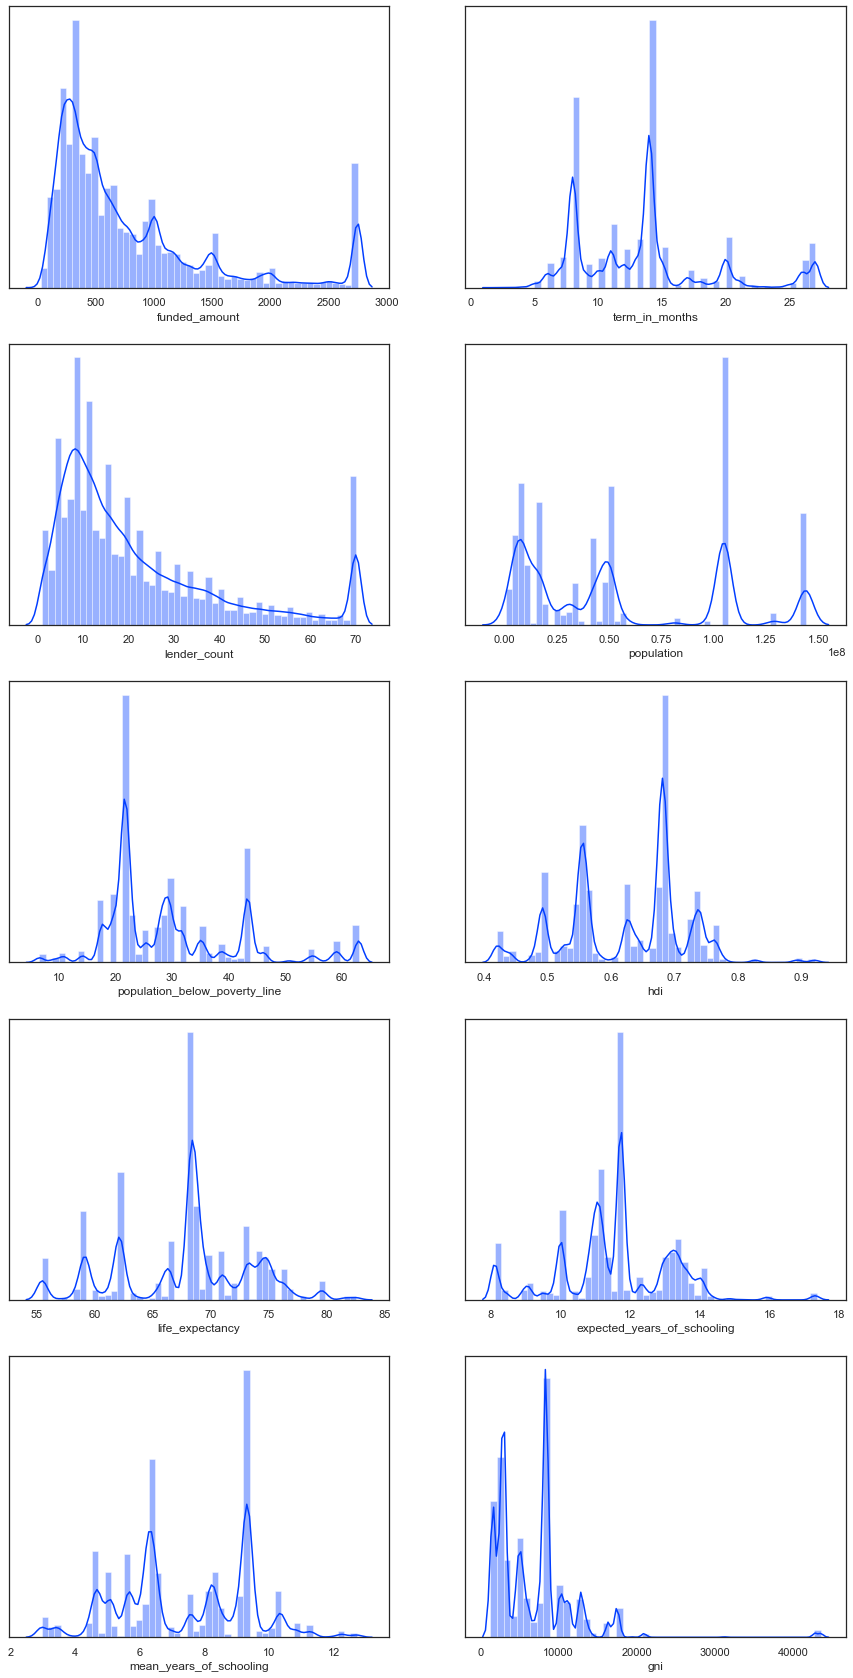

In [22]:
#Create loop to plot distributions of integer features

f, axes = plt.subplots(5, 2, figsize=(15, 30))
sns.set_context(font_scale=20)

matrix = [(0,0), (0,1), 
          (1,0), (1,1), 
          (2,0), (2,1), 
          (3,0), (3,1), 
          (4,0), (4,1),   
          ]

for j, col in enumerate(numeric_cols):
    sns.distplot(combokiva['{}'.format(col)], color="b", ax=axes[matrix[j][0],matrix[j][1]])
    

plt.setp(axes, yticks=[])
plt.show()

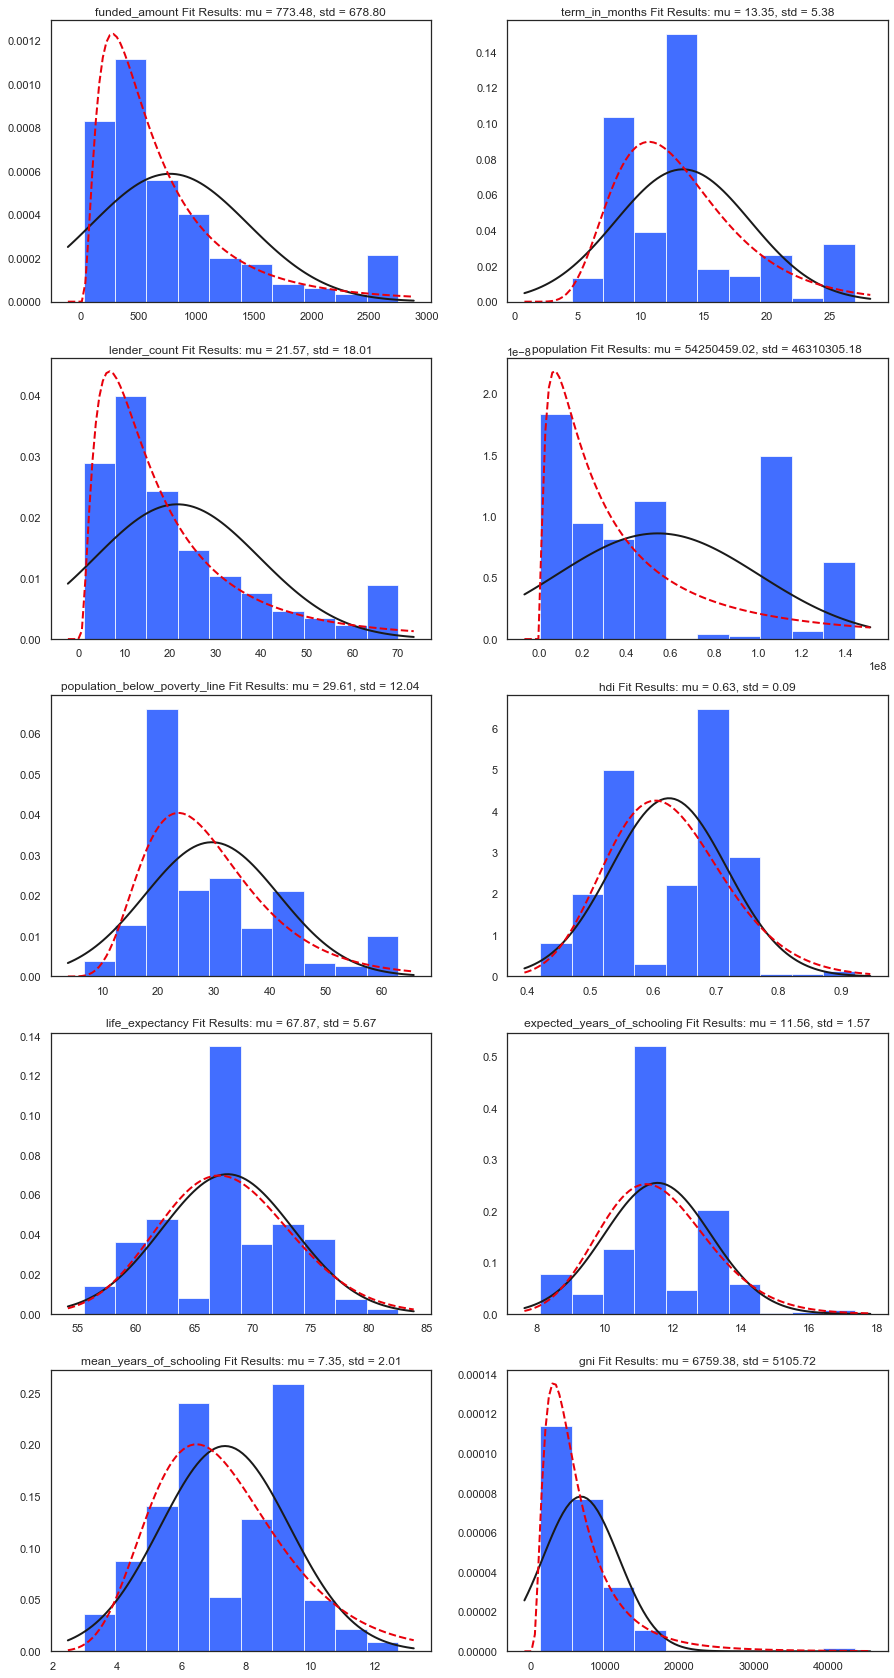

In [23]:
#Create loop to plot normal distributions of integer features and PDF

#Define the plot space and data for plots
numeric_cols = combokiva.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15, 30))

#For loop to iterate each of the 11 numerical cols into the subplots
for i, col in enumerate(numeric_cols):
    plt.subplot(5,2,i+1)
    mu, std  = norm.fit(combokiva['{}'.format(col)])
    s, loc, scale = stats.lognorm.fit(combokiva['{}'.format(col)], floc=0)
    plt.hist(combokiva['{}'.format(col)], normed=True, color = 'b', alpha=0.75)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    pdf = stats.lognorm.pdf(x, s, scale=scale)
    plt.plot(x, p, 'k', linewidth=2)
    plt.plot(x, pdf, 'r', linewidth=2, linestyle = '--')
    plt.title("{} Fit Results: mu = {:.2f}, std = {:.2f}".format(col, mu, std))
    
plt.savefig('data_distributions_combokiva.png')    
plt.show()


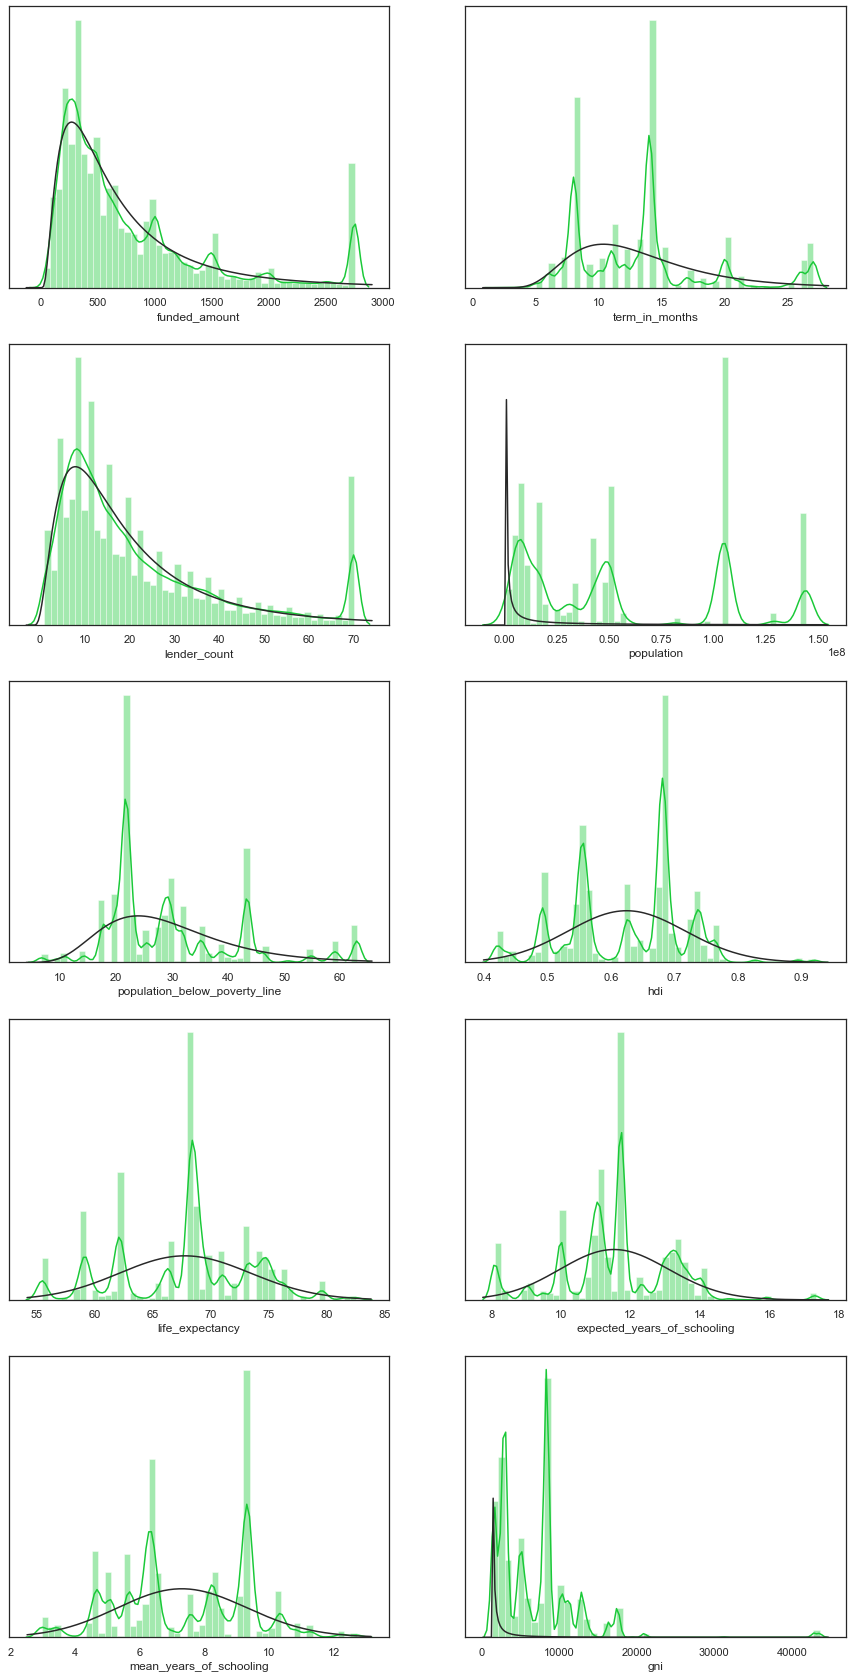

In [24]:
#Same as above but now using seaborn just to practice

f, axes = plt.subplots(5, 2, figsize=(15, 30))
sns.set_context(font_scale=20)

matrix = [(0,0), (0,1), 
          (1,0), (1,1), 
          (2,0), (2,1), 
          (3,0), (3,1), 
          (4,0), (4,1),   
          ]
for j, col in enumerate(numeric_cols):
    sns.distplot(combokiva['{}'.format(col)], fit=lognorm, color = 'g', kde=True, ax=axes[matrix[j][0],matrix[j][1]])
    

plt.setp(axes, yticks=[])
plt.show()

In [25]:
#Create a function to perform certain calculations to plot various relationships by country
#First need to create a new variable to capture average loans per country
#And while we're at it, don't forget to convert 'id' bake into an integer (makes the 
#math actually work!)

loan_count = combokiva['lender_count'].sum() / combokiva['id'].nunique()
combokiva['id'] = combokiva['id'].apply(int)

#Let's groupby and include an aggregate function for the variables we want to calculate:

profile = round(combokiva.groupby('kiva_country_name').agg({'funded_amount': 'sum', 
                                                      'lender_count':'sum', 
                                                      'population_below_poverty_line':'mean',
                                                      'term_in_months' : 'mean',
                                                      'id' : 'nunique',
                                                      }),2).reset_index()

profile['avg_lenders_p_loan'] = (round(profile['lender_count'] / profile['id'],2))*100
profile['avg_lenders_p_100k lent'] = (round((profile['lender_count'] / profile['funded_amount']/1000),2))
profile['funded_amount'] = round(profile['funded_amount'] / 1000, 2)
profile['loan_count'] = profile['id']

data = profile.sort_values('funded_amount', ascending = False)


In [26]:
#Append dataframe with loan count by country
combokiva['loan_count'] = combokiva.groupby('kiva_country_name')['id'].transform('nunique')

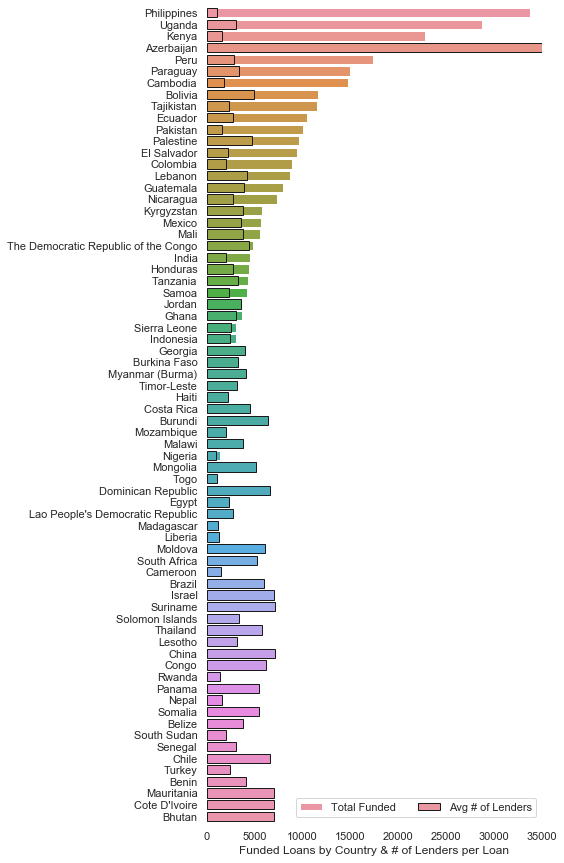

In [27]:
# Now to plot the groupby country information to gain a better udnderstanding of our dataframe
# and possbily identify some key features to use for our model
#Initialize the matplotlib figure

#Set up the plot area and set color palette (for seaborn)
f, ax = plt.subplots(figsize=(6, 15))
palette = sns.color_palette("YlGnBu")
sns.set_context(font_scale=20)


# Plot the total funded loans
sns.set_color_codes("deep")
sns.barplot(x="funded_amount", y="kiva_country_name", 
            data=data,
            label="Total Funded")

# Plot the loans with lender totals
#sns.color_palette("YlGnBu")
#sns.set_color_codes("muted")
sns.barplot(x="avg_lenders_p_loan", y="kiva_country_name", 
            data=data,
            label="Avg # of Lenders", edgecolor=".1")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35000), ylabel="",xlabel="Funded Loans by Country & # of Lenders per Loan")
sns.despine(left=True, bottom=True)

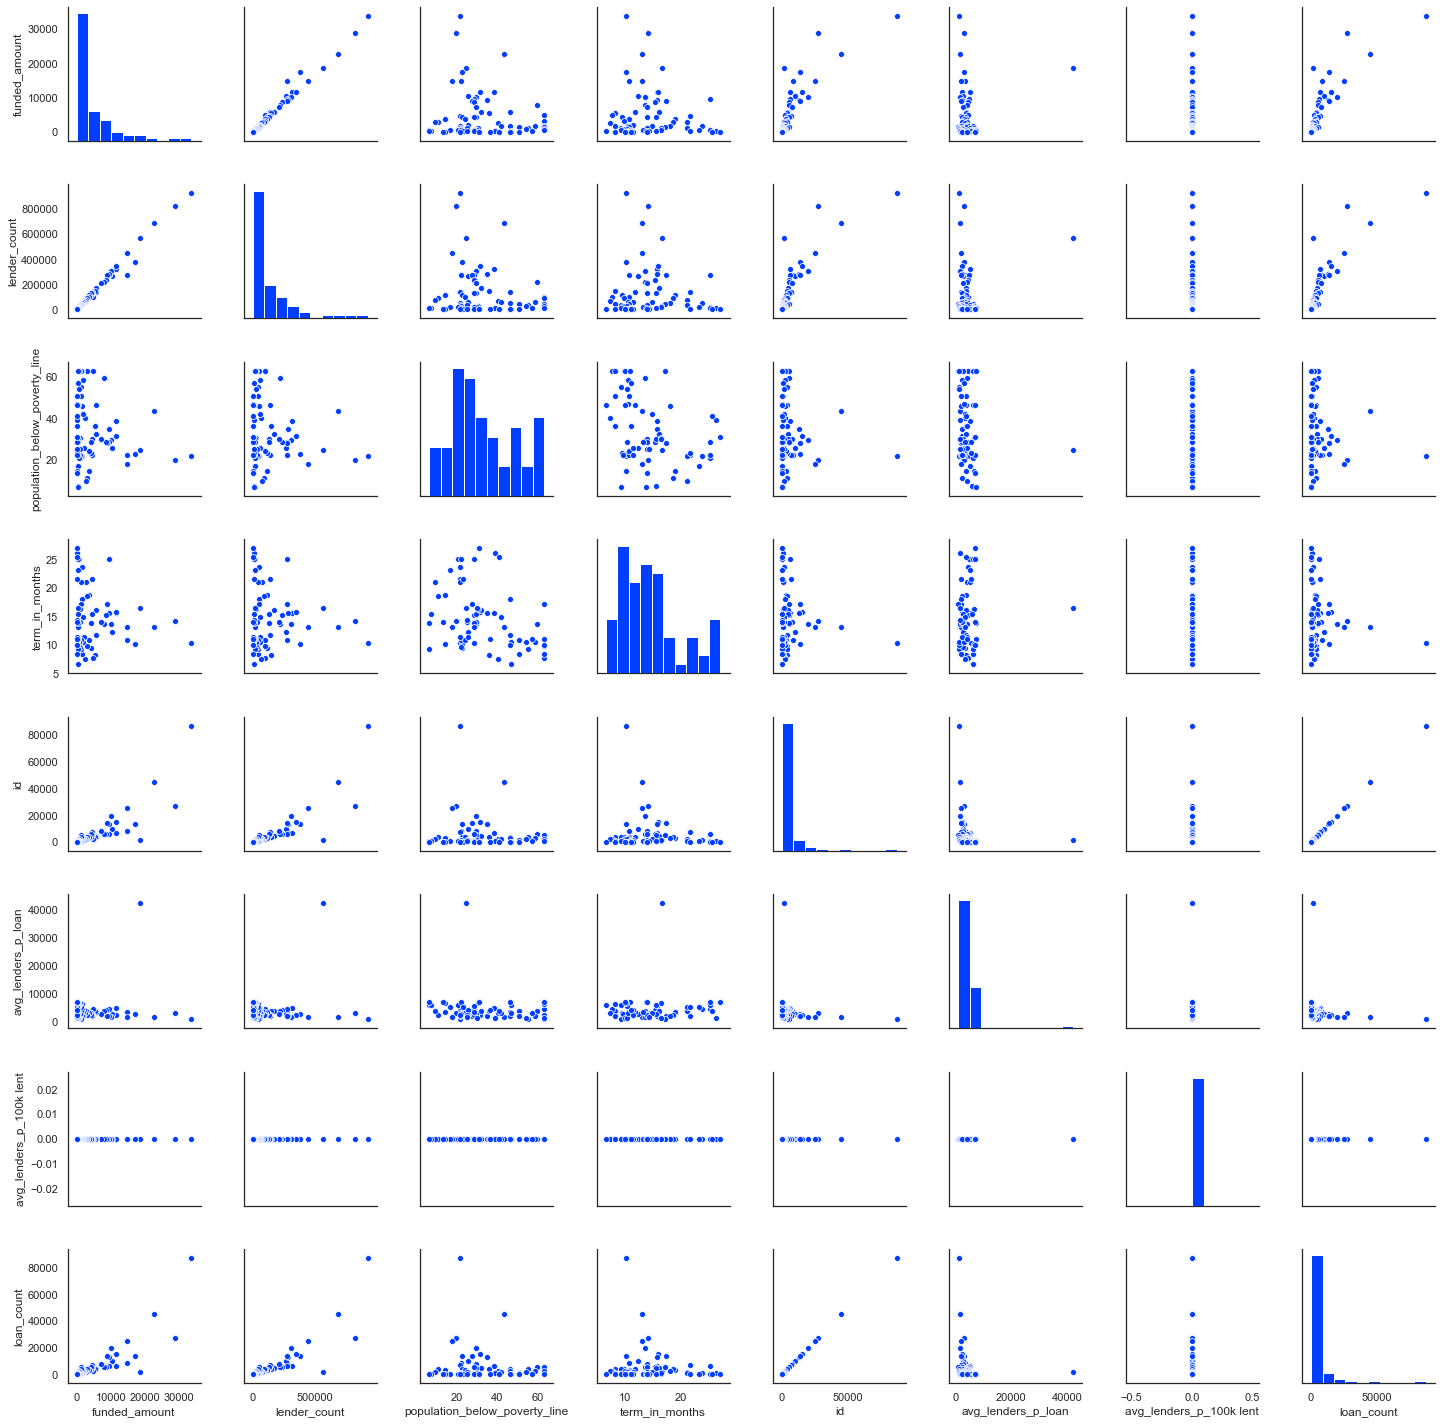

In [28]:
#Let's continue to explore but now with multivariate exploration
#Looking for relationships among the variables so will use pairplot

#Set up the plot area
figsize=(10, 50)
sns.set_context(font_scale=20)
palette = sns.color_palette("YlGnBu")
sns.set_color_codes("deep")

#Let's look at funded amounts and poverty levels
sns.pairplot(data)

### 2) Perform feature engineering for the categorical features and the continuous features 

This wil be a regression model as the target variable is predicting the loan amount (funded amount) however some  features such as country, borrower gender and sector are categorical variables and may be important in determining if a loan will be made and if so, how much.  

In [29]:
#Now to explore the classification variables...

#Let's remove and extra spaces to start
combokiva.columns = combokiva.columns.str.replace('','')

In [30]:
#Too many unique values in genders (should be binary) and it's because they count multiple borrowers' gender's
#within the field, i.e. it's a list within a list so let's create categories.

combokiva['borrower_genders'] = [elem if elem in ['female','male'] 
                                 else 'group' for elem in combokiva['borrower_genders'] ]

combokiva['borrower_genders'].unique().tolist()

['female', 'group', 'male']

In [31]:
#Group the gender variables to make them dummy variables between 0-2
#Create a numerical grouping for gender
def gender_group(gender):
    if gender == 'female':
        return 0
    elif gender == 'male':
        return 1
    else:
        return 2
    
#use .apply() method by calling the function above.
combokiva['gender_group'] = combokiva['borrower_genders'].apply(gender_group)

#Let's check how many are group
print(combokiva.groupby('gender_group')['borrower_genders'].count())

gender_group
0    263099
1    101809
2     61856
Name: borrower_genders, dtype: int64


In [32]:
#Create a classification grouping to identify country by UN classification: developed, devloping, low income
#From the UN website: 
# Threshold	GNI/Capita (current US$)
# Low-income	
# Lower-middle income	996 - 3,895
# Upper-middle income	3,896 - 12,055
# High-income	> 12,055

#Create a numerical grouping for country development stage
def country_category(income_level):
    if income_level >= 12055:
        return 1
    elif income_level >= 3896:
        return 2
    else:
        return 3

#use .apply() method by calling the function above.
combokiva['country_class'] = combokiva['gni'].apply(country_category)

# Check to see how many observations are in each group
print(combokiva.groupby('country_class')['gni'].count())

country_class
1     46640
2    219151
3    160973
Name: gni, dtype: int64


In [33]:
#Create a classification grouping for the 13 industrial sectors people lend towards

#Create a numerical grouping for industry sector

def sector_class(industry):
    if industry == 'Services':
        return 1
    elif industry == 'Agriculture':
        return 2
    elif industry == 'Construction':
        return 3
    elif industry =='Retail':
        return 4
    elif industry == 'Food':
        return 5
    elif industry == 'Arts':
        return 6
    elif industry == 'Education':
        return 7
    elif industry == 'Health':
        return 8
    elif industry == 'Manufacturing':
        return 9
    elif industry == 'Clothing':
        return 10
    elif industry == 'Personal Use':
        return 11
    elif industry == 'Housing':
        return 12
    else:
        return 13

#use .apply() method by calling the function above.
combokiva['sector_category'] = combokiva['sector'].apply(sector_class)

# Check to see how many observations are in each group
print(combokiva.groupby('sector_category')['sector'].count())

sector_category
1      40101
2     120438
3       4128
4      71876
5      81877
6       7868
7      23230
8       6132
9       3845
10     20242
11     26080
12     20497
13       450
Name: sector, dtype: int64


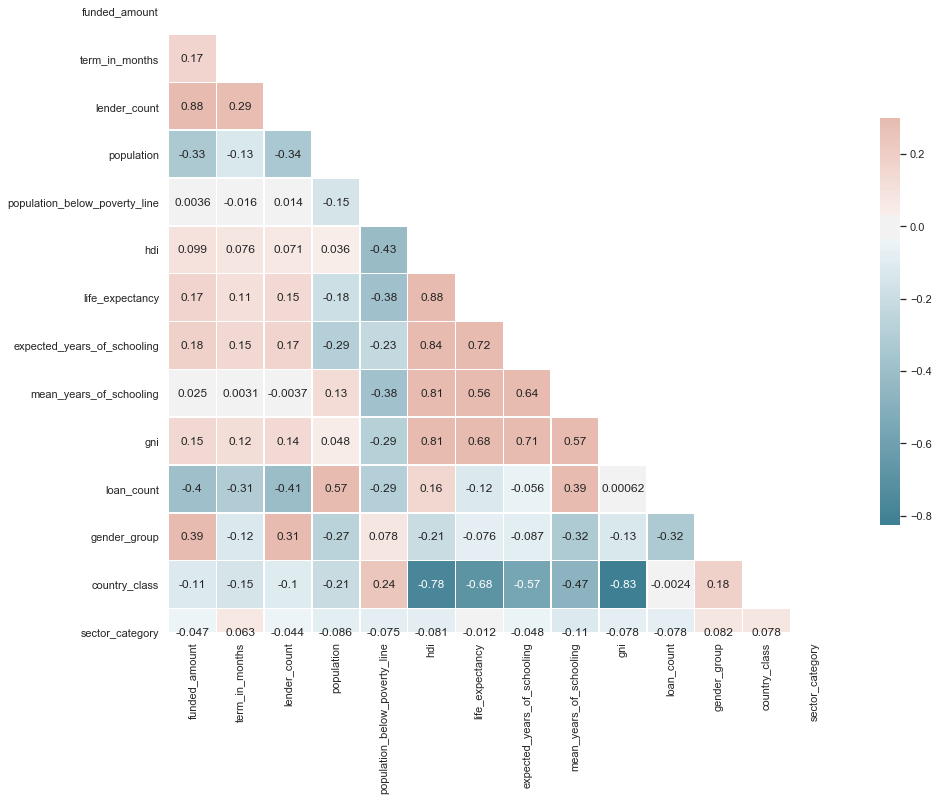

In [34]:
#Quick correlation matrix 

#Convert the ID field into an object 
combokiva['id'] = combokiva['id'].apply(str)

# Compute the correlation matrix
corr = combokiva.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the plot figure
f, ax = plt.subplots(figsize=(15, 15))
sns.set(style="white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, n=7, as_cmap=True)
#cmap = sns.diverging_palette(255, 133, l=60, n=7, center="bright", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, annot = True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('correlation_matrix.png')

In [35]:
#Define the columns from which to run the correlation (numeric)

numeric_cols = combokiva.select_dtypes(include=[np.number]).columns
non_numeric_cols = combokiva.select_dtypes(['object']).columns

#List & sort the numerical variables' correlations against target variable
np.abs(combokiva[numeric_cols].iloc[:,0:].corr().loc[:,'funded_amount']).sort_values(ascending=False)

funded_amount                    1.000000
lender_count                     0.878269
loan_count                       0.395472
gender_group                     0.391706
population                       0.330290
expected_years_of_schooling      0.183904
life_expectancy                  0.171658
term_in_months                   0.168291
gni                              0.153280
country_class                    0.113164
hdi                              0.099019
sector_category                  0.047008
mean_years_of_schooling          0.024835
population_below_poverty_line    0.003624
Name: funded_amount, dtype: float64

In [36]:
#Drop features that will not be needed
combokiva = combokiva.drop(['id', 'currency','activity', 'use', 'country_code_x', 'region_x', 'posted_time', 
                            'disbursed_time', 'funded_time', 'date', 'country_code_y', 'country_code3', 
                            'continent', 'region_y', 'sector', 'country_name', 'borrower_genders'], axis=1)

In [37]:
round(combokiva.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
funded_amount,426764.0,773.48,678.80,25.00,300.00,525.00,1.000000e+03,2.750000e+03
term_in_months,426764.0,13.35,5.38,2.00,8.00,14.00,1.400000e+01,2.700000e+01
lender_count,426764.0,21.57,18.01,1.00,9.00,15.00,2.900000e+01,7.000000e+01
population,426764.0,54250459.02,46310359.43,611343.00,11051600.00,42862958.00,1.049181e+08,1.439898e+08
population_below_poverty_line,426764.0,29.61,12.04,6.60,21.60,25.60,3.490000e+01,6.300000e+01
hdi,426764.0,0.63,0.09,0.42,0.55,0.65,6.800000e-01,9.200000e-01
life_expectancy,426764.0,67.87,5.67,55.48,62.16,68.34,7.206000e+01,8.254000e+01
expected_years_of_schooling,426764.0,11.56,1.57,8.11,10.90,11.73,1.287000e+01,1.735000e+01
mean_years_of_schooling,426764.0,7.35,2.01,2.97,5.78,6.94,9.330000e+00,1.270000e+01
gni,426764.0,6759.38,5105.73,1262.17,2880.74,6154.89,8.395090e+03,4.360882e+04


In [38]:
combokiva.to_csv('/Users/sjadallah/Dropbox/Thinkful_data/Capstone 2 Supervised Learning/combokiva.csv')

## 3) Building the model

The target output or variable of interest is 'funded_amount' and we want model or predict the decision making for determing the size of the funds lent given teh various features.  We have a set of 15 features of which 3 are classfication or categorical variables and the remainig are continuous variables.  

Approach will be to build an ensemble of models deploying boosting to first determine the strength of classification variables towards making a loan decision and then utizling regression (OLS, KNN Regression, XGBoost and Random Forest) to estimate the size of the loan given certain features. 


### 3a) Start with the classification models

### Decision Tree

Target output: Funded Amount

In [39]:
combokiva.columns.values

array(['funded_amount', 'kiva_country_name', 'term_in_months',
       'lender_count', 'repayment_interval', 'population',
       'population_below_poverty_line', 'hdi', 'life_expectancy',
       'expected_years_of_schooling', 'mean_years_of_schooling', 'gni',
       'loan_count', 'gender_group', 'country_class', 'sector_category'],
      dtype=object)

In [40]:
#Create the data sets for the Decision Tree Model
dt_features = combokiva.loc[:, ~combokiva.columns.isin(['funded_amount', 'kiva_country_name', 'repayment_interval',])]

# Make the remaining categorical variables 'kiva_country_name' and 'repayment_interval' into dummies.
dt_features = pd.concat([dt_features, pd.get_dummies(combokiva[['repayment_interval']])], axis=1)

dt_features.head()

,term_in_months,lender_count,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,loan_count,gender_group,country_class,sector_category,repayment_interval_bullet,repayment_interval_irregular,repayment_interval_monthly
0,27.0,6,143989754,21.9,0.623559,68.322,11.69659,6.298834,5663.474799,6967,0,2,1,1,0,0
1,27.0,8,143989754,21.9,0.623559,68.322,11.69659,6.298834,5663.474799,6967,0,2,2,1,0,0
2,27.0,7,143989754,21.9,0.623559,68.322,11.69659,6.298834,5663.474799,6967,0,2,2,1,0,0
3,27.0,4,143989754,21.9,0.623559,68.322,11.69659,6.298834,5663.474799,6967,0,2,1,1,0,0
4,27.0,10,143989754,21.9,0.623559,68.322,11.69659,6.298834,5663.474799,6967,0,2,3,1,0,0


In [41]:
#Now define the X and Y parameters for the model 
X = dt_features
y = combokiva['funded_amount']

#Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(X.shape, y.shape)
print(X_test.shape, y_test.shape)
print(X_train.shape, y_train.shape)

(426764, 16) (426764,)
(85353, 16) (85353,)
(341411, 16) (341411,)


In [43]:
#Import the Decision Tree model
from sklearn.tree import DecisionTreeRegressor    
from IPython.display import Image
import pydotplus
#import graphviz

#Now define the X and Y parameters for the model 
X = dt_features.sample(n=50000, random_state=0)
y = combokiva['funded_amount'].sample(n=50000, random_state=0)

#Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(X_test.shape, y_test.shape)
print(X_train.shape, y_train.shape)
print(X.shape, y.shape)

(10000, 16) (10000,)
(40000, 16) (40000,)
(50000, 16) (50000,)


In [44]:
import time

start_drt = time.time()

#Create training and test set
DRT_X_train, DRT_X_test, drt_y_train, drt_y_test = train_test_split(X, y, test_size=0.20)


#Initialize and fit the model
drt_model = DecisionTreeRegressor(criterion='mse', max_depth=5)
drt_model.fit(DRT_X_train, drt_y_train)

# Predict the target outout
drt_y_pred = drt_model.predict(DRT_X_test)

end_drt = time.time()
time_drt= end_drt - start_drt
print('Decision Tree Regressor time:{:}'.format(time_drt))

Decision Tree Regressor time:0.07993507385253906


In [45]:
DRT_output=pd.DataFrame({'Actual':drt_y_test, 'Predicted':drt_y_pred})
round(DRT_output.describe(), 2)

,Actual,Predicted
count,10000.00,10000.00
mean,766.86,766.19
std,677.43,620.37
min,25.00,265.83
25%,300.00,265.83
50%,500.00,544.60
75%,1000.00,956.78
max,2750.00,2664.62


In [46]:
from sklearn import metrics

mae_drt = metrics.mean_absolute_error(drt_y_test, drt_y_pred)
mape_drt = np.mean(np.abs((drt_y_test - drt_y_pred) / drt_y_test))
mse_drt = metrics.mean_squared_error(drt_y_test, drt_y_pred)
rmse_drt = np.sqrt(metrics.mean_squared_error(drt_y_test, drt_y_pred))
time_drt= end_drt - start_drt

print(('Mean Absolute Error: {:.4f}').format(mae_drt))
print(('Mean Absolute Percentage Error: {:.4f}').format(mape_drt))
print(('Mean Squared Error: {:.4f}').format(mse_drt))
print(('Root Mean Squared Error: {:.3f}').format(rmse_drt))

Mean Absolute Error: 163.3891
Mean Absolute Percentage Error: 0.3167
Mean Squared Error: 71339.9969
Root Mean Squared Error: 267.095


In [47]:
#Now to apply cross-validation to the DRT model
print('DRT Cross valiation score: ', cross_val_score(drt_model, X, y, cv = 10))

DRT Cross valiation score:  [0.86501973 0.84345653 0.84745665 0.84875368 0.85353563 0.85469415
 0.84403472 0.83569179 0.85285977 0.839915  ]


### Gradient Booster and XGBoost

In [61]:
#Now try the model with gradient boosting
from xgboost import XGBRegressor
start_xgb = time.time()

#Define the X and Y parameters for the model 
XGB_X = dt_features.sample(n=50000, random_state=0)
xgb_y = combokiva['funded_amount'].sample(n=50000, random_state=0)

#Create training and test set
XGB_X_train, XGB_X_test, xgb_y_train, xgb_y_test = train_test_split(XGB_X, xgb_y, test_size=0.20)


# We'll make 1000 iterations, use 4-deep trees, and set parameters
parameters = {'learning_rate' : 0.5,
        'n_estimators': 1000,
        'max_depth': 5,
        'min_child_weight': 1,
        'gamma': 5,
        'subsample': 0.1,
        'colsample_bytree': 0.8,
        'objective' : 'binary:logistic',
        'nthread':4,
        'scale_pos_weight': 1,
        }

param_dist = {'objective':'reg:squarederror', 'n_estimators':100}


# Initialize and fit the model.
xgb_model = XGBRegressor(**param_dist)

xgb_model.fit(XGB_X_train, xgb_y_train,
             eval_set=[(XGB_X_train, xgb_y_train), (XGB_X_test, xgb_y_test)],
             eval_metric='mae',
             verbose=0)

xgb_y_pred_train = xgb_model.predict(XGB_X_train)
xgb_y_pred_test = xgb_model.predict(XGB_X_test)

# Evaluate predictions
#evals_result = xgb_model.evals_result()
mae_xgb = metrics.mean_absolute_error(xgb_y_test, xgb_y_pred_test)
mape_xgb = np.mean(np.abs((xgb_y_test - xgb_y_pred_test) / xgb_y_test))
mse_xgb = metrics.mean_squared_error(xgb_y_test, xgb_y_pred_test)
rmse_xgb = np.sqrt(mean_squared_error(xgb_y_test, xgb_y_pred_test))

print(('Mean Absolute Error: {:.3f}').format(mae_xgb))
print(('Mean Absolute Percentage Error: {:.3f}').format(mape_xgb))
print(('Mean Squared Error: {:.3f}').format(mse_xgb))
print(('Root Mean Squared Error: {:.3f}').format(rmse_xgb))

end_xgb = time.time()
time_xgb = end_xgb - start_xgb
print('XGB Regressor time:{:}'.format(time_xgb))


Mean Absolute Error: 139.155
Mean Absolute Percentage Error: 0.253
Mean Squared Error: 46547.584
Root Mean Squared Error: 215.749
XGB Regressor time:5.875122785568237


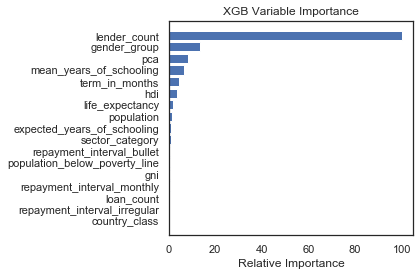

In [62]:
#Visualize the features of importance from teh XGBooster
xgb_feature_importance = xgb_model.feature_importances_

# Make importances relative to max importance fro XGB
xgb_feature_importance = 100.0 * (xgb_feature_importance / xgb_feature_importance.max())
xgb_sorted_idx = np.argsort(xgb_feature_importance)
pos = np.arange(xgb_sorted_idx.shape[0]) + .5

plt.barh(pos, xgb_feature_importance[xgb_sorted_idx], align='center')
plt.yticks(pos, XGB_X.columns[xgb_sorted_idx])
plt.xlabel('Relative Importance')
plt.title('XGB Variable Importance')
plt.savefig('Feature_ranking.png')

plt.tight_layout()
plt.show()

### Random Forest

In [50]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

start_rf = time.time()

#Create training and test set
RF_X_train, RF_X_test, rf_y_train, rf_y_test = train_test_split(X, y, test_size=0.20)


rf_model = ensemble.RandomForestRegressor() #n_jobs tells the model how many cores to run, -1 use as many
rf_model.fit(RF_X_train, rf_y_train)

rf_y_pred=rf_model.predict(RF_X_test)

mae_rf = metrics.mean_absolute_error(rf_y_test, rf_y_pred)
mape_rf = np.mean(np.abs((rf_y_test - rf_y_pred) / rf_y_test))
mse_rf = metrics.mean_squared_error(rf_y_test, rf_y_pred)
rmse_rf = np.sqrt(metrics.mean_squared_error(rf_y_test, rf_y_pred))

end_rf = time.time()
time_rf = end_rf - start_rf

print(('Mean Absolute Error: {:.4f}').format(mae_rf))
print(('Mean Absolute Percentage Error: {:.4f}').format(mape_rf))
print(('Mean Squared Error: {:.4f}').format(mse_rf))
print(('Root Mean Squared Error: {:.3f}').format(rmse_rf))
print('RF Regressor time:{:}'.format(time_rf))
print('Prediction: {:}'.format(rf_y_pred))

Mean Absolute Error: 136.6838
Mean Absolute Percentage Error: 0.2218
Mean Squared Error: 51789.2267
Root Mean Squared Error: 227.572
RF Regressor time:1.585665225982666
Prediction: [2225.         1412.5         318.2204172  ...  183.8356151   825.83333333
  238.86400524]


### 3b) Regression Models

### KNN Regression

In [63]:
# Build the KNN regression model.
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors

start_knn = time.time()

#Define the features for X and Y
KNN_features=dt_features[['lender_count', 'hdi', 'term_in_months', 'gender_group']].sample(n=50000, random_state=0)
KNN_X = KNN_features
knn_y = combokiva['funded_amount'].sample(n=50000, random_state=0)

#Create training and test set
KNN_X_train, KNN_X_test, knn_y_train, knn_y_test = train_test_split(KNN_X, knn_y, test_size=0.20)

#Fit the model
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
knn.fit(KNN_X_train, knn_y_train)

knn_w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_w.fit(KNN_X_train, knn_y_train)

# Set up our prediction line.
knn_y_pred = knn.predict(KNN_X_test)
knn_y_w_pred = knn_w.predict(KNN_X_test)

end_knn = time.time()
time_knn = end_knn - start_knn

#Evaluate the results
score = cross_val_score(knn, KNN_X, knn_y, cv=5)
score_w = cross_val_score(knn_w, KNN_X, knn_y, cv=5)

print("Unweighted Accuracy: %0.2f (+/- %0.4f)" % (score.mean(), score.std() * 2))
print("Weighted Accuracy: %0.2f (+/- %0.4f)" % (score_w.mean(), score_w.std() * 2))
print('KNN Regressor time:{:}'.format(time_knn))

Unweighted Accuracy: 0.86 (+/- 0.0125)
Weighted Accuracy: 0.85 (+/- 0.0109)
KNN Regressor time:0.31281614303588867


### OLS Regression

In [52]:
#Define the X and Y parameters for the model 
OLS_X = dt_features.sample(n=50000, random_state=0)
ols_y = combokiva['funded_amount'].sample(n=50000, random_state=0)

#Create training and test set
OLS_X_train, OLS_X_test, ols_y_train, ols_y_test = train_test_split(OLS_X, ols_y, test_size=0.20)


#Estimate the model using only training data set
# We need to manually add a constant in statsmodels' sm
OLS_X_train = sm.add_constant(OLS_X_train)
ols_model = sm.OLS(ols_y_train, OLS_X_train).fit()

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          funded_amount   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 1.127e+04
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        21:41:24   Log-Likelihood:            -2.8432e+05
No. Observations:               40000   AIC:                         5.687e+05
Df Residuals:                   39984   BIC:                         5.688e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           128.4147     33.580      3.824      0.000      62.597     194.232
term_in_months                   -6.8100      0.334    -20.403      0.000      -7.464      -6.156
lender_count                     30.9920      0.101    307.897      0.000      30.795      31.189
population                    -8.842e-08    5.7e-08     -1.551      0.121      -2e-07    2.34e-08
population_below_poverty_line     0.0704      0.152      0.465      0.642      -0.227       0.367
hdi                             220.2095    129.522      1.700      0.089     -33.657     474.076
life_expectancy                  -1.3083      0.981     -1.333      0.182      -3.231       0.615
expected_years_of_schooling      -5.1669      2.897     -1.784      0.074     -10.844       0.510
mean_years_of_schooling          26.3798      2.005     13.156      0.000      22.450      30.310
gni                              -0.0058      0.001     -9.031      0.000      -0.007      -0.005
loan_count                       -0.0022   8.41e-05    -26.301      0.000      -0.002      -0.002
gender_group                    140.4901      2.460     57.119      0.000     135.669     145.311
country_class                   -54.5122      5.891     -9.253      0.000     -66.059     -42.965
sector_category                  -4.0428      0.477     -8.482      0.000      -4.977      -3.109
repayment_interval_bullet       -43.6735     11.696     -3.734      0.000     -66.599     -20.748
repayment_interval_irregular    138.2274     11.373     12.154      0.000     115.936     160.519
repayment_interval_monthly       33.8609     11.787      2.873      0.004      10.758      56.964
==============================================================================
Omnibus:                    25553.255   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           410799.808
Skew:                           2.841   Prob(JB):                         0.00
Kurtosis:                      17.635   Cond. No.                     1.62e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.68e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

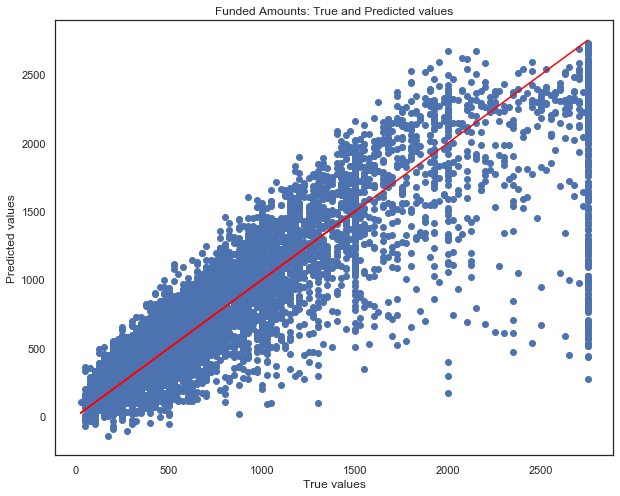

Mean Absolute Error: 189.4847
Mean Absolute Percentage Error: 0.3334
Mean Squared Error: 87804.2757
Root Mean Squared Error: 296.318


In [53]:
# Don't forget to add the constant to the model. Run the model on the test set now
OLS_X_test = sm.add_constant(OLS_X_test)

# We are making predictions here
ols_y_pred = ols_model.predict(OLS_X_test)


plt.figure(figsize=(10,8))
plt.scatter(ols_y_test, ols_y_pred)
plt.plot(ols_y_test, ols_y_test, color="red")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Funded Amounts: True and Predicted values")
plt.savefig('OLS_pred_plot.png')
plt.show()


mae_ols = metrics.mean_absolute_error(ols_y_test, ols_y_pred)
mape_ols = np.mean(np.abs((ols_y_test - ols_y_pred) / ols_y_test))
mse_ols = metrics.mean_squared_error(ols_y_test, ols_y_pred)
rmse_ols = np.sqrt(metrics.mean_squared_error(ols_y_test, ols_y_pred))


print(('Mean Absolute Error: {:.4f}').format(mae_ols))
print(('Mean Absolute Percentage Error: {:.4f}').format(mape_ols))
print(('Mean Squared Error: {:.4f}').format(mse_ols))
print(('Root Mean Squared Error: {:.3f}').format(rmse_ols))


In [55]:
# We fit an OLS model using sklearn
ols_lrm = LinearRegression()
ols_lrm.fit(OLS_X_train, ols_y_train)

# We are making predictions here
ols_lrm_y_pred_train = ols_lrm.predict(OLS_X_train)
ols_lrm_y_pred_test = ols_lrm.predict(OLS_X_test)


print('-----OLS Linear Regression Model Results----------')
print("R-squared of the model in the training set is: {:.4f}".format(ols_lrm.score(OLS_X_train, ols_y_train)))
print("Mean absolute error of the training set is: {:.4f}".format(mean_absolute_error(ols_y_train, ols_lrm_y_pred_train)))
print("Mean squared error of the training set is: {:.4f}".format(mse(ols_y_train, ols_lrm_y_pred_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {:.4f}".format(ols_lrm.score(OLS_X_test, ols_y_test)))
print("Mean absolute error of the prediction is: {:.4f}".format(mean_absolute_error(ols_y_test, ols_lrm_y_pred_test)))
print("Mean squared error of the prediction is: {:.4f}".format(mse(ols_y_test, ols_lrm_y_pred_test)))
print("Root mean squared error of the prediction is: {:.4f}".format(rmse(ols_y_test, ols_lrm_y_pred_test)))
print("Mean absolute percentage error of the prediction is: {:.4f}".format(np.mean(
                                                                        np.abs((ols_y_test - ols_lrm_y_pred_test) 
                                                                        / ols_y_test)
                                                                            )))

-----OLS Linear Regression Model Results----------
R-squared of the model in the training set is: 0.8088
Mean absolute error of the training set is: 188.8371
Mean squared error of the training set is: 87407.0052
-----Test set statistics-----
R-squared of the model in the test set is: 0.8073
Mean absolute error of the prediction is: 189.4847
Mean squared error of the prediction is: 87804.2757
Root mean squared error of the prediction is: 296.3179
Mean absolute percentage error of the prediction is: 0.3334


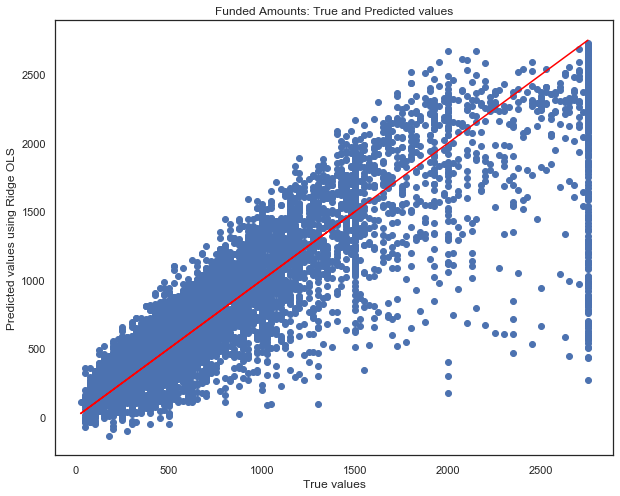

-----OLS Ridge Regression Model Results----------
R-squared of the model in the training set is: 0.8088
Mean absolute error of the training set is: 188.7763
Mean squared error of the training set is: 87414.4261
-----Test set statistics-----
R-squared of the model in the test set is: 0.8071
Mean absolute error of the prediction is: 189.4808
Mean squared error of the prediction is: 87871.2697
Root mean squared error of the prediction is: 296.4309
Mean absolute percentage error of the prediction is: 0.3334


In [56]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ols_rdg = Ridge(alpha=10**2) 
ols_rdg.fit(OLS_X_train, ols_y_train)

# We are making predictions here
ols_rdg_y_pred_train = ols_rdg.predict(OLS_X_train)
ols_rdg_y_pred_test = ols_rdg.predict(OLS_X_test)


plt.figure(figsize=(10,8))
plt.scatter(ols_y_test, ols_rdg_y_pred_test)
plt.plot(ols_y_test, ols_y_test, color="red")
plt.xlabel("True values")
plt.ylabel("Predicted values using Ridge OLS")
plt.title("Funded Amounts: True and Predicted values")
plt.savefig('Ridge_OLS_plot.png')
plt.show()

print('-----OLS Ridge Regression Model Results----------')
print("R-squared of the model in the training set is: {:.4f}".format(ols_rdg.score(OLS_X_train, ols_y_train)))
print("Mean absolute error of the training set is: {:.4f}".format(mean_absolute_error(ols_y_train, ols_rdg_y_pred_train)))
print("Mean squared error of the training set is: {:.4f}".format(mse(ols_y_train, ols_rdg_y_pred_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {:.4f}".format(ols_rdg.score(OLS_X_test, ols_y_test)))
print("Mean absolute error of the prediction is: {:.4f}".format(mean_absolute_error(ols_y_test, ols_rdg_y_pred_test)))
print("Mean squared error of the prediction is: {:.4f}".format(mse(ols_y_test, ols_rdg_y_pred_test)))
print("Root mean squared error of the prediction is: {:.4f}".format(rmse(ols_y_test, ols_rdg_y_pred_test)))
print("Mean absolute percentage error of the prediction is: {:.4f}".format(np.mean(
                                                                        np.abs((ols_y_test - ols_rdg_y_pred_test) 
                                                                        / ols_y_test)
                                                                            )))

In [57]:
#Application of PCA to highly correlated features in order to reduce feature count and improve OLS model
#Select the features and scale the features
z = dt_features[['hdi', 'life_expectancy', 'expected_years_of_schooling', 'mean_years_of_schooling', 'gni']]
z = StandardScaler().fit_transform(z)

#Run PCA
kiva_pca = PCA(n_components=1)
dt_features['pca'] = kiva_pca.fit_transform(z)

print('The percentage of total variance in the dataset explained by each component from Sklearn PCA.\n', 
     kiva_pca.explained_variance_ratio_)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.77984401]



### Now run the OLS regression model using lognormal distribution, dropping certain features and incorporating PCA

In [58]:
GM_X = dt_features[['term_in_months', 'lender_count', 'loan_count', 'gender_group', 
                    'sector_category', 'pca'
                   ]].sample(n=50000, random_state=0)

In [59]:
#Define the X and Y parameters for the model
#OLS1_X = dt_features[['term_in_months', 'lender_count', 
#                   ]].sample(n=50000, random_state=0)

gm_y = combokiva['funded_amount'].sample(n=50000, random_state=0)

#Create training and test set
GM_X_train, GM_X_test, gm_y_train, gm_y_test = train_test_split(GM_X, gm_y, test_size=0.20)


# Instantiate a gamma family model with the default link function.

#Estimate the model using only training data set
# We need to manually add a constant in statsmodels' sm
GM_X_train = sm.add_constant(GM_X_train)
gamma_model = sm.GLM(gm_y_train, GM_X_train, family=sm.families.Gamma())
gamma_model_results = gamma_model.fit()

#print(gamma_model_results.summary())
gamma_model_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          funded_amount   No. Observations:                40000
Model:                            GLM   Df Residuals:                    39993
Model Family:                   Gamma   Df Model:                            6
Link Function:          inverse_power   Scale:                         0.36119
Method:                          IRLS   Log-Likelihood:            -3.6431e+05
Date:                Tue, 19 Nov 2019   Deviance:                       67847.
Time:                        21:41:26   Pearson chi2:                 1.44e+04
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0022   7.49e-06    300.053      0.000       0.002       0.002
term_in_months  -1.671e-07   2.61e-08     -6.396      0.000   -2.18e-07   -1.16e-07
lender_count    -2.809e-05   1.01e-07   -279.270      0.000   -2.83e-05   -2.79e-05
loan_count       8.914e-09   9.09e-11     98.041      0.000    8.74e-09    9.09e-09
gender_group       -0.0002    9.1e-07   -256.223      0.000      -0.000      -0.000
sector_category  1.303e-05   1.11e-07    116.946      0.000    1.28e-05    1.32e-05
pca             -5.124e-05   1.91e-07   -267.895      0.000   -5.16e-05   -5.09e-05
===================================================================================
"""